# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are recommended to create your own notebook from scratch.

> Make sure to include markdown-based text commenting and explaining each step you perform.

# 0- Importing Libraries and Loading Data

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import pyarrow as pa

In [6]:
# modify by placing your own directory where the datasets resides
data_dir = './Datasets/'

# 1- Extraction

Read the csv file and convert it to parquet format (first time only).

In [7]:
# read the csv file and convert it to parquet
# fintech_df_csv = pd.read_csv(data_dir + 'fintech_data_38_52_20136.csv')
# pq.write_table(pa.Table.from_pandas(fintech_df_csv), data_dir + 'fintech_data.parquet')

read the parquet file normally and show the first row just to make sure that the data is loaded correctly.

In [8]:
fintech_df : pd.DataFrame = None
def read_parquet_file(file_path=data_dir + 'fintech_data.parquet') -> pd.DataFrame:
    global fintech_df, data_dir
    fintech_df = pq.read_table(file_path).to_pandas().set_index('Loan Id')
    return fintech_df
read_parquet_file().sample(2)

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,...,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description
Loan Id,,,,,,,,,,,,,,,,,,,,,
139152,Yid1aVx4ZTRceGNjXHhhOFx4YmFcbldmXHhjNlx4Zjkzd0...,Customer Service Rep,7 years,RENT,61600.0,NaN,Verified,322xx,FL,4819.0,...,FL,14000.0,36 months,0.1356,13,19 January 2019,False,Individual,debt_consolidation,Debt consolidation
41431,YidceDA0bFx4ZTFceGZiXFxbXHhiNFx4YWM0XHgxYjVceG...,Systems Engineer,10+ years,RENT,70000.0,NaN,Not Verified,331xx,FL,2366.0,...,FL,6000.0,36 months,0.0917,7,16 January 2016,False,INDIVIDUAL,home_improvement,Home improvement


# 2- EDA

- First, we need to check the columns and their data types *(i.e. some info)*.

In [9]:
fintech_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27030 entries, 72174 to 108547
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Id          27030 non-null  object 
 1   Emp Title            24648 non-null  object 
 2   Emp Length           25144 non-null  object 
 3   Home Ownership       27030 non-null  object 
 4   Annual Inc           27030 non-null  float64
 5   Annual Inc Joint     1897 non-null   float64
 6   Verification Status  27030 non-null  object 
 7   Zip Code             27030 non-null  object 
 8   Addr State           27030 non-null  object 
 9   Avg Cur Bal          27030 non-null  float64
 10  Tot Cur Bal          27030 non-null  float64
 11  Loan Status          27030 non-null  object 
 12  Loan Amount          27030 non-null  float64
 13  State                27030 non-null  object 
 14  Funded Amount        27030 non-null  float64
 15  Term                 27030 non-null 

- Second, we may need to check the percentage of missing values in each column.

In [10]:
# form output for each column get missing values count and percentage
def show_missing_values_stats(df: pd.DataFrame, hide_non_missing: bool = False):
    missing_values = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])
    missing_values['Percentage'] = missing_values['Missing Values'] / df.shape[0] * 100
    missing_values['Data Type'] = df.dtypes
    missing_values['Unique'] = df.nunique()
    if hide_non_missing:
        missing_values = missing_values[missing_values['Missing Values'] > 0]
    missing_values = missing_values.sort_values(by=['Missing Values', 'Unique'], ascending=False)
    print(missing_values)
show_missing_values_stats(fintech_df)

                     Missing Values  Percentage Data Type  Unique
Annual Inc Joint              25133   92.981872   float64     688
Emp Title                      2382    8.812431    object   13089
Emp Length                     1886    6.977432    object      11
Int Rate                       1265    4.679985   float64     372
Description                     248    0.917499    object     821
Customer Id                       0    0.000000    object   27030
Tot Cur Bal                       0    0.000000   float64   25563
Avg Cur Bal                       0    0.000000   float64   16970
Annual Inc                        0    0.000000   float64    3138
Loan Amount                       0    0.000000   float64    1185
Funded Amount                     0    0.000000   float64    1185
Zip Code                          0    0.000000    object     853
Issue Date                        0    0.000000    object      89
Addr State                        0    0.000000    object      50
State     

In [11]:
fintech_df.describe()

,Annual Inc,Annual Inc Joint,Avg Cur Bal,Tot Cur Bal,Loan Amount,Funded Amount,Int Rate,Grade
count,2.703000e+04,1.897000e+03,27030.000000,2.703000e+04,27030.000000,27030.000000,25765.000000,27030.000000
mean,7.868950e+04,1.318543e+05,13517.602886,1.431000e+05,15365.320015,15365.320015,0.131064,10.975398
std,5.676035e+04,7.912136e+04,16517.413470,1.595284e+05,9470.959190,9470.959190,0.049329,6.414098
min,5.000000e+02,2.505600e+04,0.000000,0.000000e+00,1000.000000,1000.000000,0.053100,1.000000
25%,4.800000e+04,8.500000e+04,3103.250000,2.875325e+04,8000.000000,8000.000000,0.091700,6.000000
50%,6.700000e+04,1.150460e+05,7270.500000,7.938100e+04,13100.000000,13100.000000,0.126100,10.000000
75%,9.500000e+04,1.550000e+05,18688.000000,2.146155e+05,20000.000000,20000.000000,0.160200,15.000000
max,2.548000e+06,1.465000e+06,337533.000000,2.792401e+06,40000.000000,40000.000000,0.309900,35.000000


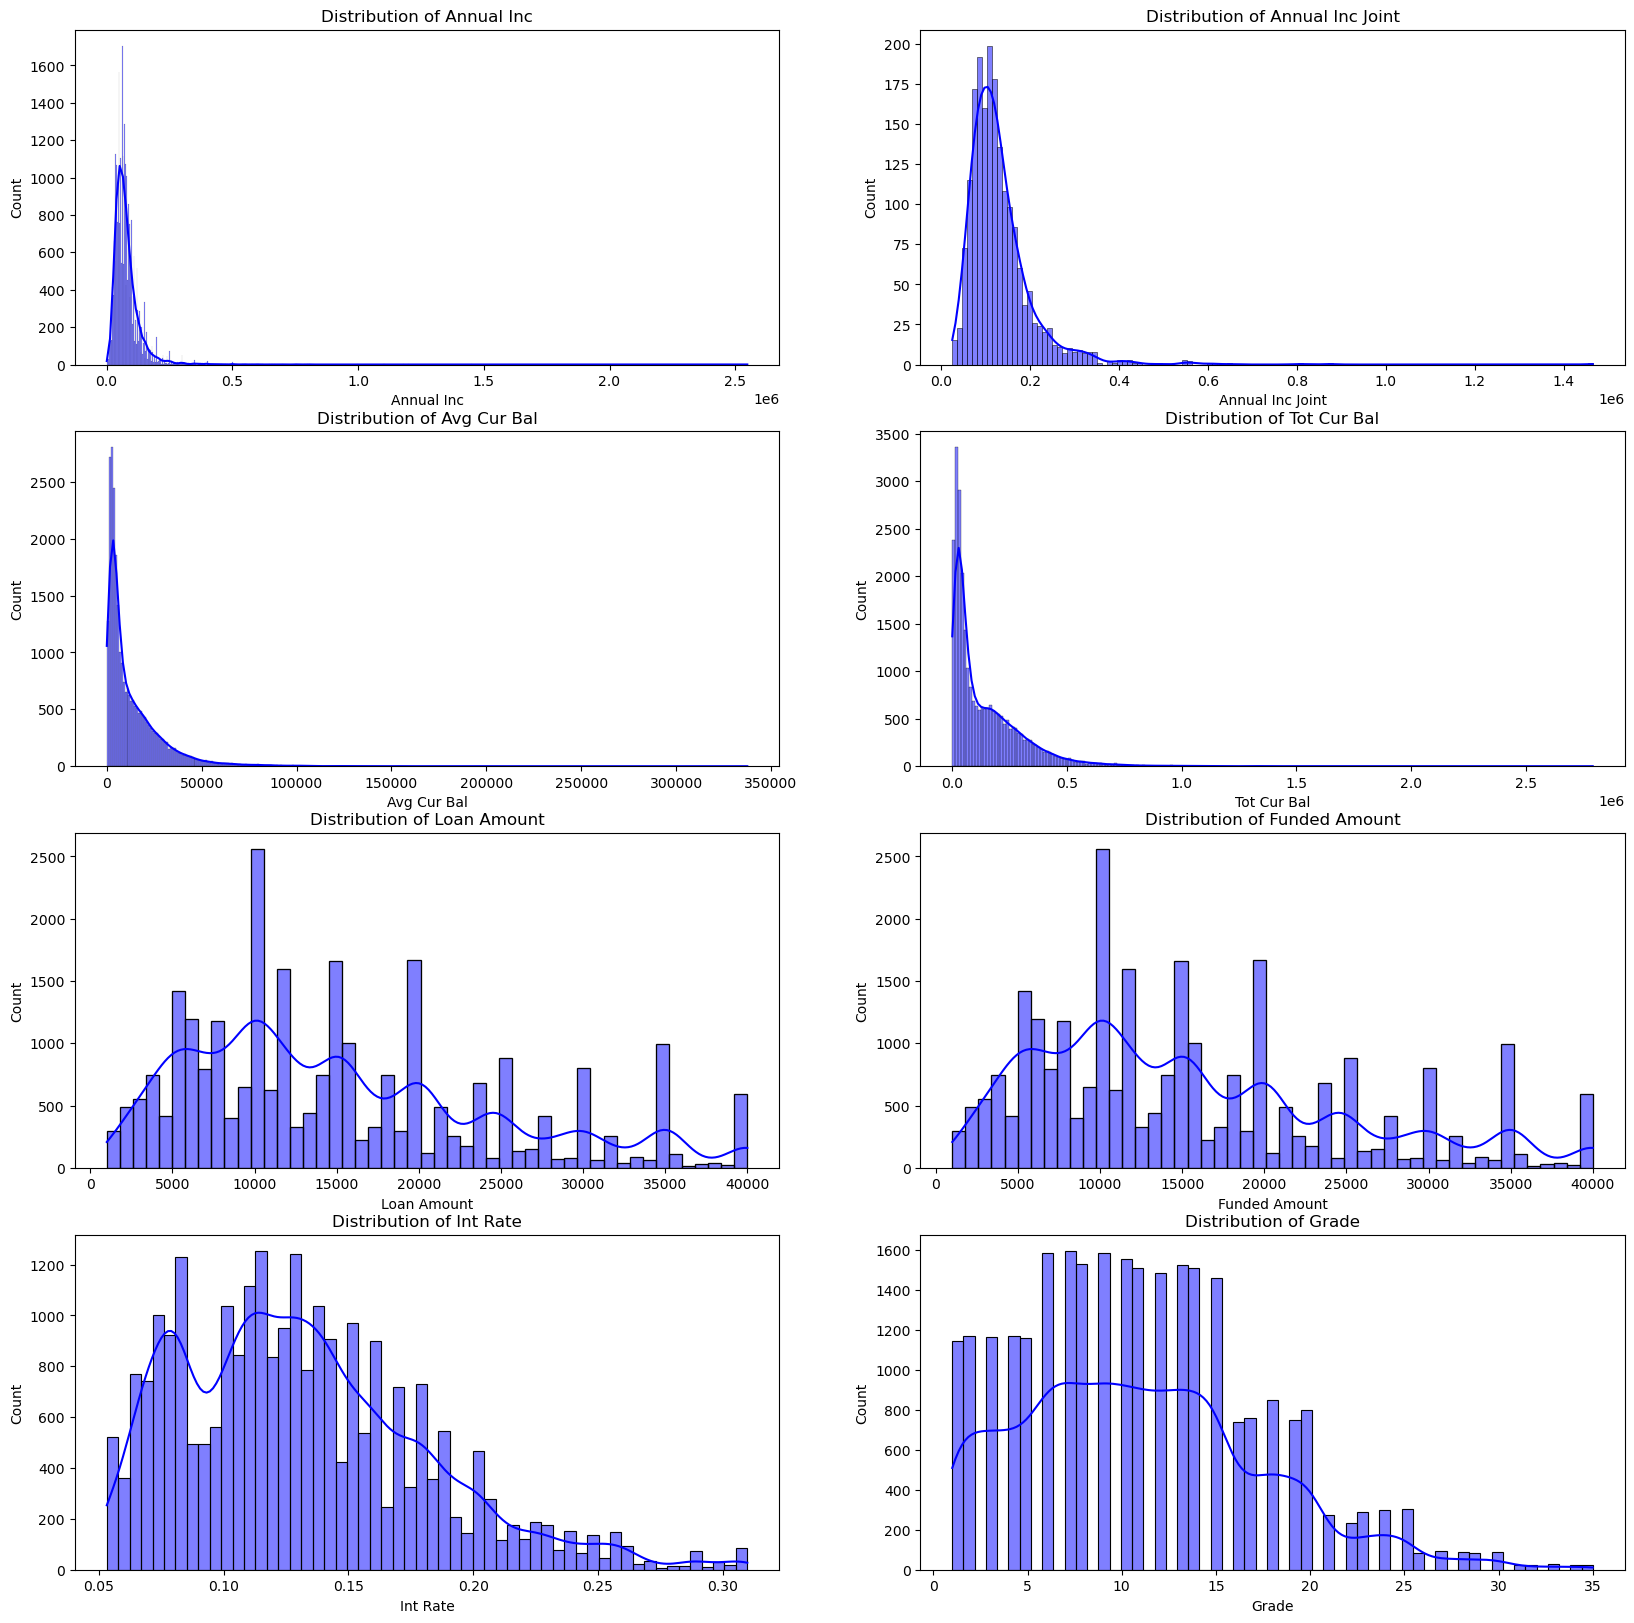

In [12]:
# plot the distribution of all numeric columns in one plot 4x2
def plot_distribution(df: pd.DataFrame):
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))
    for i, col in enumerate(df.select_dtypes(include=np.number).columns):
        sns.histplot(df[col], ax=axes[i // 2, i % 2], kde=True, color='blue')
        axes[i // 2, i % 2].set_title(f'Distribution of {col}')
    plt.show()
plot_distribution(fintech_df)


- From the previous steps graphs, we can see that the values of Annual Income(/Joint) & (Tot/Avg) Cur Bal are hugely skewed to the right. They appear also to have lots of far outliers.

- The following data description and the correlation graphs can be used to understand the data more, and maybe impute the missing values with highly correlated features.

In [13]:
fintech_df.describe(include=['object'])

,Customer Id,Emp Title,Emp Length,Home Ownership,Verification Status,Zip Code,Addr State,Loan Status,State,Term,Issue Date,Type,Purpose,Description
count,27030,24648,25144,27030,27030,27030,27030,27030,27030,27030,27030,27030,27030,26782
unique,27030,13089,11,5,3,853,50,7,50,2,89,5,13,821
top,YidceGI4Llx4YzFceDk5PVx4OWJceGZmXHhmOFx4ZmZceG...,Teacher,10+ years,MORTGAGE,Source Verified,945xx,CA,Current,CA,36 months,16 March 2016,Individual,debt_consolidation,Debt consolidation
freq,1,461,8840,13265,10376,292,3686,17116,3686,19010,653,16953,15290,14373


In [14]:
fintech_df.corr(numeric_only=True)

,Annual Inc,Annual Inc Joint,Avg Cur Bal,Tot Cur Bal,Loan Amount,Funded Amount,Int Rate,Grade,Pymnt Plan
Annual Inc,1.000000,0.760300,0.341890,0.471202,0.386269,0.386269,-0.110386,-0.109248,0.000587
Annual Inc Joint,0.760300,1.000000,0.334235,0.454023,0.315899,0.315899,-0.135026,-0.140481,0.016882
Avg Cur Bal,0.341890,0.334235,1.000000,0.828749,0.217191,0.217191,-0.076807,-0.075686,-0.004388
Tot Cur Bal,0.471202,0.454023,0.828749,1.000000,0.303817,0.303817,-0.077054,-0.075027,-0.003588
Loan Amount,0.386269,0.315899,0.217191,0.303817,1.000000,1.000000,0.067050,0.062376,0.011872
Funded Amount,0.386269,0.315899,0.217191,0.303817,1.000000,1.000000,0.067050,0.062376,0.011872
Int Rate,-0.110386,-0.135026,-0.076807,-0.077054,0.067050,0.067050,1.000000,0.924078,0.014171
Grade,-0.109248,-0.140481,-0.075686,-0.075027,0.062376,0.062376,0.924078,1.000000,0.018844
Pymnt Plan,0.000587,0.016882,-0.004388,-0.003588,0.011872,0.011872,0.014171,0.018844,1.000000


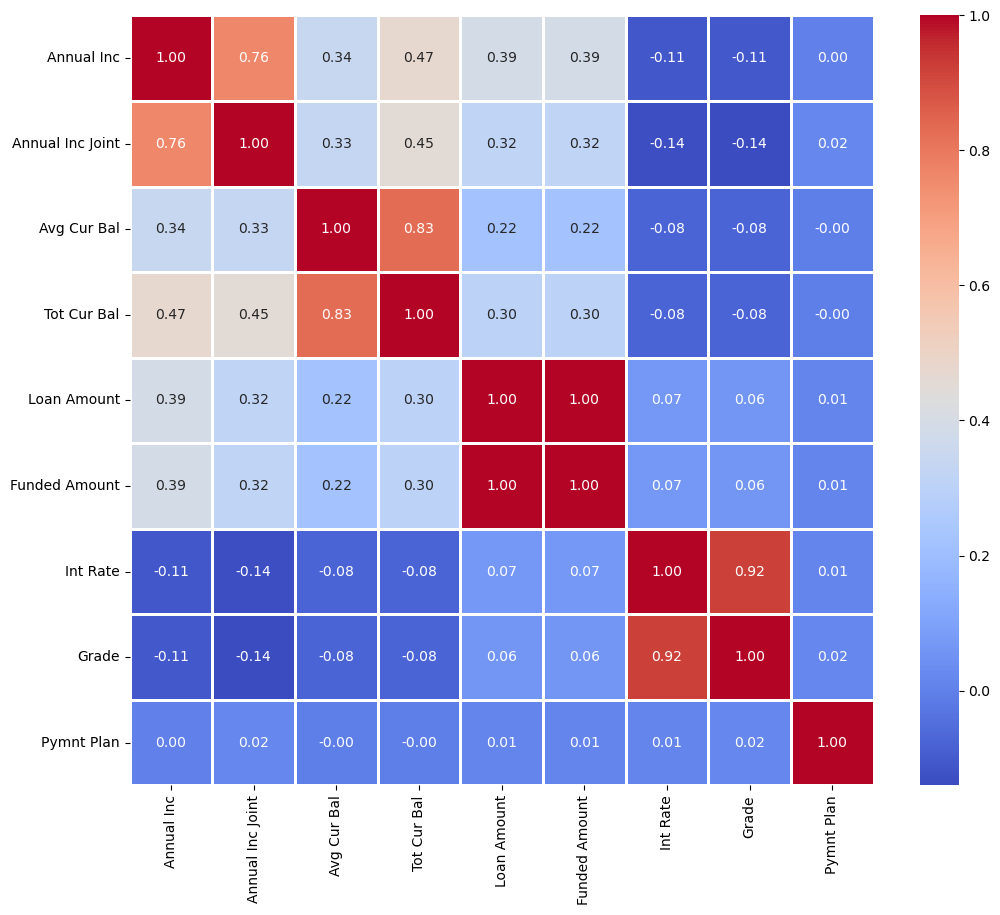

In [15]:
def plot_correlation_heatmap(df: pd.DataFrame):
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
    plt.show()
plot_correlation_heatmap(fintech_df)

# 3 - Cleaning Data

## Tidying up column names

In [16]:
# tidy up column names by removing spaces and converting to lower case
fintech_df_cleaned = fintech_df.copy()
fintech_df_cleaned.columns = fintech_df.columns.str.replace(' ', '_').str.lower()

In [17]:
fintech_df_cleaned.columns

Index(['customer_id', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'verification_status', 'zip_code',
       'addr_state', 'avg_cur_bal', 'tot_cur_bal', 'loan_status',
       'loan_amount', 'state', 'funded_amount', 'term', 'int_rate', 'grade',
       'issue_date', 'pymnt_plan', 'type', 'purpose', 'description'],
      dtype='object')

## Converting data types

### Convert emp_length to integer

In [18]:
fintech_df_cleaned['emp_length'].value_counts()

emp_length
10+ years    8840
< 1 year     2477
2 years      2367
3 years      2133
1 year       1803
5 years      1698
4 years      1621
6 years      1197
7 years      1041
8 years      1037
9 years       930
Name: count, dtype: int64

- we can choose to change 10+ years to 10 and < 1 year to 0 to make it easier to work with.

# //TODO after imputing missing values

In [19]:
# convert emp_length to integer
# fintech_df_cleaned['emp_length'] = fintech_df_cleaned['emp_length'].str.extract('(\d+)').astype(int)

### Convert issue_date to datetime

In [20]:
# convert issue_date to datetime
def tidy_issue_date() -> pd.Series:
    return pd.to_datetime(fintech_df_cleaned['issue_date'])
fintech_df_cleaned['issue_date'] = tidy_issue_date()

### Convert term to integer (months)

In [21]:
def tidy_term() -> pd.Series:
    return fintech_df_cleaned['term'].astype(str).str.extract(r'(\d+)').astype(int)
fintech_df_cleaned['term'] = tidy_term()
print(fintech_df_cleaned['term'].value_counts())

term
36    19010
60     8020
Name: count, dtype: int64


## Observe inconsistent data

In [22]:
for col in fintech_df.select_dtypes(include=np.object_).columns:
    # print the column name
    print(f'Column: {col}')
    print(fintech_df[col].unique())
    print('\n'+ ("-"*50) +'\n')

Column: Customer Id
['YidceGI4Llx4YzFceDk5PVx4OWJceGZmXHhmOFx4ZmZceGU1VVx4ZmZCXHhlYlx4YjZPXHhjNFx4YjVceDlhXHhhZCVZaVx4Y2RceDFmXHg5Y1x4YjRceDljXHhiMlx4YzNceDdmXHhlMCc='
 'YiIwXHgwZVx4OTlceDBmXHgxNFx4YjZceGE2XHhjZTxceGQxXHhhMFx4ZGRMaUxceDBmJ1xcU1x4MGJceGQ0NFx4OTJceGY4XHhhZG9ceDBmLFx4Y2ZceGE3UVx4YmEi'
 'Yicse3JceGJmXHg4OVx4OGIwXHhkNFx4Y2VceDg2XHhmNFx4MTNceGVhZ1x4ODRceGIyfFx4ZmREXHhkM09jXHgwYlx4YTRceDlkX1x4ZWJceDFiXHhiMFx4ZDlceGIyXHgxMCc='
 ...
 'YidKXHgxZFx4YWJceDhlTFx4ZTRceGIxXHg4NDFceGZiXHgwMFx4ZDRYXHgxMFx4ZGJLRjcsIlx4ZDhGXHhkOVx4ZjgyT35ceDkxXHhlM1x4ZGZceGE1Lyc='
 'YictXHhiNFx4MTEve2NceGY0XHhhNVx4MDZceGRkZlx4MWFceGExXHhhNFxceVx4YzVceDA3UUFFXHg4MVx4ZmRceGI3XHhjYlx4MWFfQkFceGFmXHgxMlx4ZGEn'
 'YidceGFkSFx4ZjBBXHhjMFx4YzVceDkwXHhiY1x4YzhCXHhhZkNceGQ3XHhiYlx4YTU6XHhmY1x4YjVceGIzZiBZXHgxZlx4ZjlceDg1XHgwNFx4YTF5XHg4NlxcXHg5N3Mn']

--------------------------------------------------

Column: Emp Title
['ARX LLC' 'Senior Project Manager' 'Project Manager' ...
 'WORKFORCE DEVELOPMENT SPECIALIST' '

In [23]:
# try to find inconsistencies in the data like case sensitivity
fintech_df_2 = fintech_df.copy()

for col in fintech_df_2.select_dtypes(include=np.object_).columns:
    # Convert the column to uppercase
    fintech_df_2[col + 'upper'] = fintech_df_2[col].str.upper()

    # Group by the uppercase values and filter groups where original values differ
    inconsistencies = fintech_df_2.groupby(col + 'upper').filter(lambda x: len(x[col].unique()) > 1)

    if inconsistencies.shape[0] > 0:
        inc = inconsistencies[col].unique()
        print(f'Column: {col} -> {inc.shape[0]} inconsistencies')
        inc.sort()
        print(inc)

Column: Emp Title -> 2551 inconsistencies
['2nd Mate' '2nd mate' 'ACCOUNT EXECUTIVE' ... 'wellpoint' 'xray tech'
 'yard foreman']
Column: Type -> 2 inconsistencies
['INDIVIDUAL' 'Individual']
Column: Description -> 228 inconsistencies
['BUSINESS' 'Bill Consolidation' 'Bill Pay' 'Bill Payoff'
 'Bill consolidation' 'Bill payoff' 'Bills' 'Business' 'CC Consolidation'
 'CC Debt Consolidation' 'CC Loan' 'CC PAYOFF' 'CC Payoff' 'CC Refinance'
 'CC consolidation' 'CC debt consolidation' 'CONSOLIDATION LOAN'
 'CREDIT CARD CONSOLIDATION' 'CREDIT CARD REFINANCE' 'CREDIT CARDS'
 'CREDITCARDDEBT' 'Car Loan' 'Cc consolidation' 'Cc refinance'
 'Clean Slate' 'Consolidate' 'Consolidate Bills' 'Consolidate bills'
 'Consolidating' 'Consolidation' 'Consolidation ' 'Consolidation Loan'
 'Consolidation loan' 'Credit Card' 'Credit Card Consolidation'
 'Credit Card Consolidation ' 'Credit Card Debt' 'Credit Card Freedom'
 'Credit Card Loan' 'Credit Card Pay Off' 'Credit Card Payoff'
 'Credit Card Refi' 'Cred

check duplicated rows or columns.

In [24]:
print('dup rows number: ',fintech_df[fintech_df.duplicated()].shape[0])
# check if there are duplicate columns
transposed_df = fintech_df.T

dup_cols = transposed_df[transposed_df.duplicated()]
# Get pairs of duplicate columns
duplicate_pairs = []
for dcol in dup_cols.index:
    for col in fintech_df.columns:
        if fintech_df[fintech_df[dcol] == fintech_df[col]].shape[0] == fintech_df.shape[0] and dcol != col:
                duplicate_pairs.append((dcol, col))

print(duplicate_pairs)


dup rows number:  0
[('State', 'Addr State'), ('Funded Amount', 'Loan Amount')]


## Findings and conclusions

emp_title, type and description columns contain data that varies in case only. We can convert them to lowercase.
*(unique values came down from 821 to 686)*

In [25]:
def clean_case_sensitivity(df: pd.DataFrame) -> pd.DataFrame:
    fintech_df_cleaned = df.copy()
    fintech_df_cleaned['emp_title'] = fintech_df_cleaned['emp_title'].str.lower()
    fintech_df_cleaned['type'] = fintech_df_cleaned['type'].str.lower()
    fintech_df_cleaned['description'] = fintech_df_cleaned['description'].str.lower()
    return fintech_df_cleaned
fintech_df_cleaned = clean_case_sensitivity(fintech_df_cleaned)

We can also see that in `type` there is joint and joint app. We can convert them to joint.

In [26]:
fintech_df_cleaned['type'].value_counts()

type
individual    25098
joint app      1798
joint            99
direct_pay       35
Name: count, dtype: int64

In [27]:
fintech_df_cleaned['type'] = fintech_df_cleaned['type'].replace({'joint app': 'joint'})
fintech_df_cleaned['type'].value_counts()

type
individual    25098
joint          1897
direct_pay       35
Name: count, dtype: int64

- I also found that there are 2 pairs of columns that are duplicates. But, theoretically, they should differ. So maybe if we get more data, we can have different values in them. So let's keep them for now.

## Observing outliers

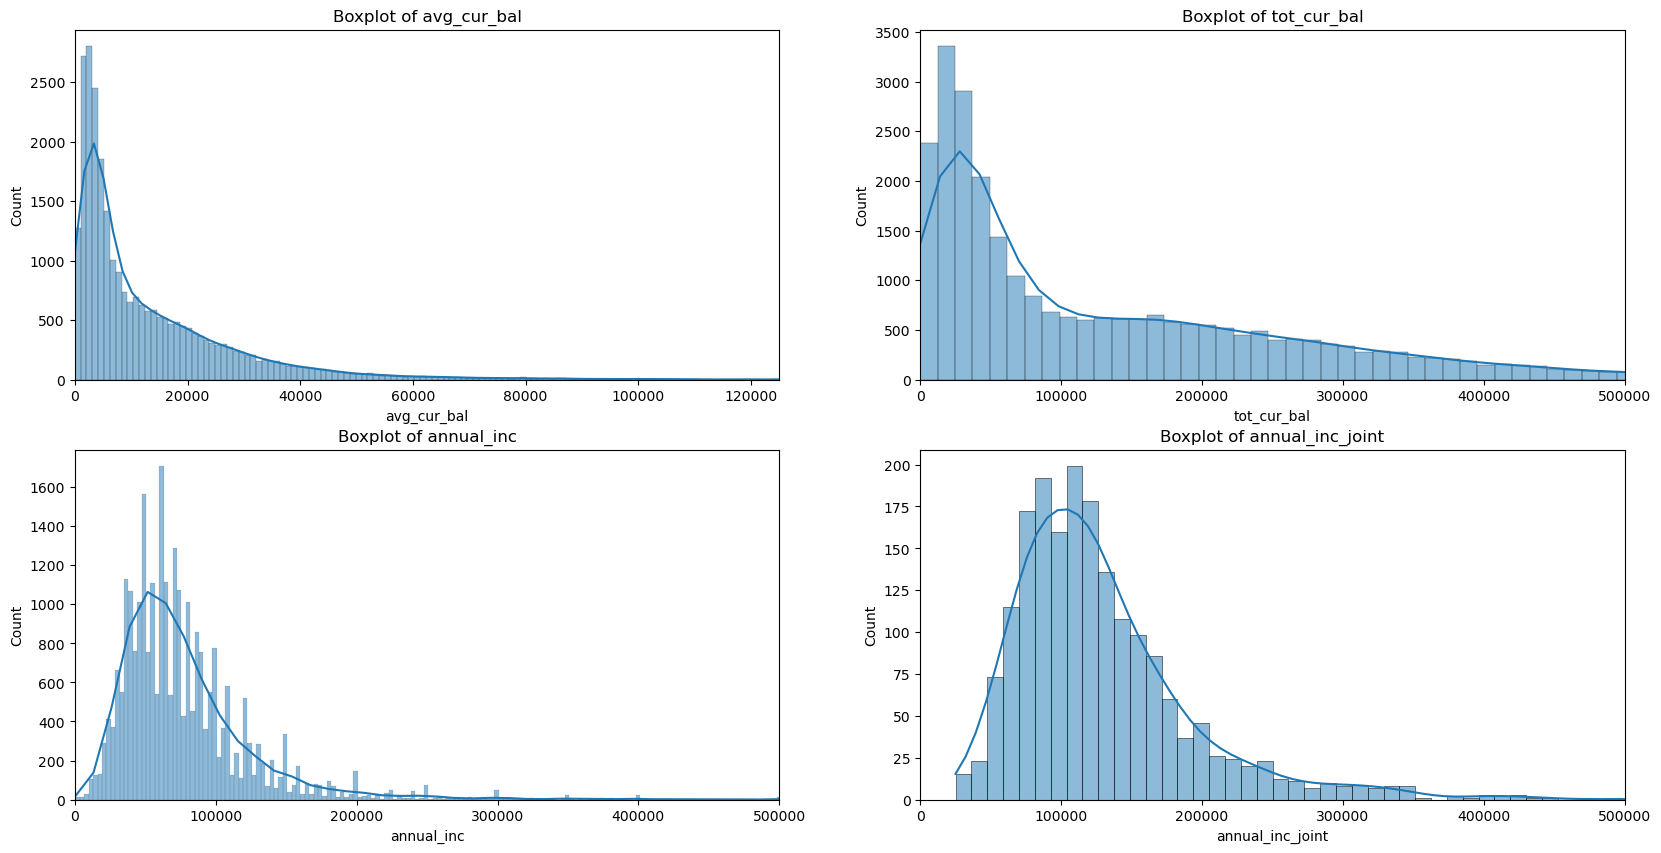

In [36]:
# plot highly visual outliers
outliers_cols = ['avg_cur_bal', 'tot_cur_bal', 'annual_inc', 'annual_inc_joint']
def plot_outliers(df: pd.DataFrame, cols: list):
    fig, axes = plt.subplots(int(len(cols)/2), 2, figsize=(20, 10))
    for i, col in enumerate(cols):
        sns.histplot(df[col], ax=axes[i // 2, i % 2], kde=True)
        axes[i // 2, i % 2].set_title(f'Boxplot of {col}')
        # limit the x-axis to 0.5 * 10^6
        x_max = 0.5 * 1000000 * (0.25 if col == 'avg_cur_bal' else 1)
        axes[i // 2, i % 2].set_xlim(0, x_max)
    plt.show()

plot_outliers(fintech_df_cleaned, outliers_cols)


## Handling outliers

## Findings and conclusions

## Observing Missing Data

In [122]:
show_missing_values_stats(fintech_df_cleaned, hide_non_missing=True)

                  Missing Values  Percentage Data Type  Unique
annual_inc_joint           25133   92.981872   float64     688
emp_title                   2382    8.812431    object   11617
emp_length                  1886    6.977432    object      11
int_rate                    1265    4.679985   float64     372
description                  248    0.917499    object     686


#### 1. For `emp_title` (8.81%), we can see that:
- around 21% of the rows that are missing `emp_title` have a value in `emp_length`
- all people that have missing values in `emp_title` have a value in `annual_inc`. As `annual_inc` have no missing values.

In [123]:
100.0- fintech_df_cleaned[fintech_df_cleaned['emp_title'].isnull() & fintech_df_cleaned['emp_length'].isnull()].shape[0] / fintech_df_cleaned[fintech_df_cleaned['emp_title'].isnull()].shape[0] * 100,                                                                        fintech_df_cleaned[fintech_df_cleaned['emp_title'].isnull() & fintech_df_cleaned['annual_inc'].isnull()].shape[0] / fintech_df_cleaned[fintech_df_cleaned['emp_title'].isnull()].shape[0] * 100


(21.116708648194788, 0.0)

#### 2. For `int_rate` (4.68%):
- we cannot say that the missing values mean that the loan has zero interest rate as this is not realistic (at least in the US, where the data is based).
- we need to impute the missing values.
- we can see from the correlation matrix that `int_rate` is highly correlated with `grade` (92%). So we can use `grade` to impute the missing values.

    

In [124]:
fintech_df_cleaned[fintech_df_cleaned['int_rate'].isnull()]['loan_status'].value_counts()
# plot_correlation_heatmap(fintech_df_cleaned)
fintech_df_cleaned.corr(numeric_only=True)['int_rate'].sort_values(ascending=False)

int_rate            1.000000
grade               0.924078
term                0.351820
loan_amount         0.067050
funded_amount       0.067050
pymnt_plan          0.014171
avg_cur_bal        -0.076807
tot_cur_bal        -0.077054
annual_inc         -0.110386
annual_inc_joint   -0.135026
Name: int_rate, dtype: float64

#### 3. For `annual_inc_joint` (92.98%):
- we can see that the `annual_inc_joint` is missing for all the rows or loans that are not of type `joint`. 
- we can deduce that the it is missing purposely as it is not applicable for non-joint loans.
- since the `annual_inc_joint` is the combined income of the borrower and the co-borrower, we can impute the missing values with the value of `annual_inc` as we can say that the co-borrower has no income.

In [125]:
print('The types of loan (& their counts) that exist are:',fintech_df_cleaned['type'].value_counts().to_dict(),'\n', ('-'*50))
print('The types of loan that exist which have annual_inc_joint null are:', fintech_df_cleaned[fintech_df_cleaned['annual_inc_joint'].isnull()]['type'].value_counts().to_dict(),'\n', ('-'*50))
print('Number of people who have type of loan = "joint" & have annual_inc_joint null =',  fintech_df_cleaned[ (fintech_df_cleaned['type'] == 'joint') & fintech_df_cleaned['annual_inc_joint'].isnull()].shape[0])

The types of loan (& their counts) that exist are: {'individual': 25098, 'joint': 1897, 'direct_pay': 35} 
 --------------------------------------------------
The types of loan that exist which have annual_inc_joint null are: {'individual': 25098, 'direct_pay': 35} 
 --------------------------------------------------
Number of people who have type of loan = "joint" & have annual_inc_joint null = 0


#### 4. For `emp_length` (6.98%):

In [126]:
fintech_df_cleaned['emp_length'].isnull().sum() , fintech_df_cleaned['emp_length'].value_counts().to_dict()
print(' The number of people who have emp_length null and emp_title null are:', fintech_df_cleaned[ (fintech_df_cleaned['emp_length'].isnull()) & (fintech_df_cleaned['emp_title'].isnull())].shape[0])
print('VS number of people who have emp_length null and emp_title not null are:', fintech_df_cleaned[ (fintech_df_cleaned['emp_length'].isnull()) & (fintech_df_cleaned['emp_title'].notnull())].shape[0])

def test_check_emp_length(df: pd.DataFrame):
    fintech_df_emp_length = df.copy()
    fintech_df_emp_length['emp_title'] = fintech_df_emp_length['emp_title'].fillna(fintech_df_emp_length['emp_title'].mode()[0])
    fintech_df_emp_length['emp_length']= fintech_df_emp_length['emp_length'].fillna('11 years')
    # replace '< 1 year' with 0 years
    fintech_df_emp_length['emp_length'] = fintech_df_emp_length['emp_length'].replace({'< 1 year': '0 years'})
    fintech_df_emp_length['emp_length'] = fintech_df_emp_length['emp_length'].astype(str).str.extract(r'(\d+)').astype(int)
    return fintech_df_emp_length
test = test_check_emp_length(fintech_df_cleaned)
test.corr(numeric_only=True)['emp_length'].sort_values(ascending=False) * 100


 The number of people who have emp_length null and emp_title null are: 1879
VS number of people who have emp_length null and emp_title not null are: 7


emp_length          100.000000
tot_cur_bal           6.722483
avg_cur_bal           5.698234
term                  3.599710
loan_amount           2.917727
funded_amount         2.917727
annual_inc            1.779546
grade                 0.138025
pymnt_plan            0.124125
int_rate             -0.394711
annual_inc_joint     -2.458842
Name: emp_length, dtype: float64

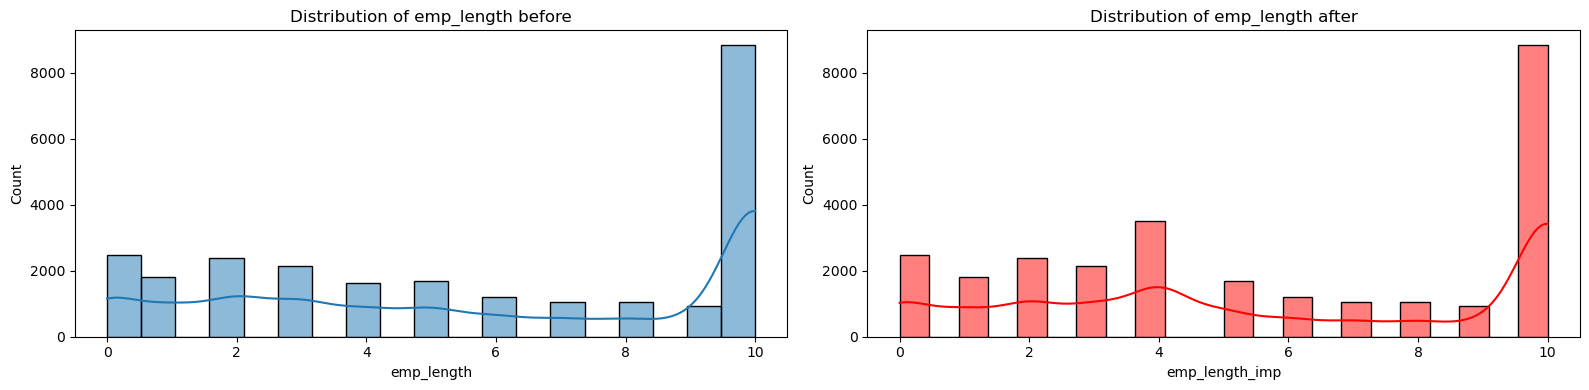

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(test[test['emp_length'] < 11]['emp_length'], kde=True, ax=axes[0])
axes[0].set_title(f'Distribution of emp_length before')

def replace_with_mean(x):
    mean_val = x[x < 11].mean()
    if pd.isna(mean_val):
        mean_val = 0
    return x.apply(lambda y: mean_val if y == 11 else y)

test['emp_length_imp'] = test.groupby('emp_title')['emp_length'].transform(replace_with_mean)
test['emp_length_imp'] = test['emp_length_imp'].astype(int)
sns.histplot(test['emp_length_imp'], kde=True, color='red', ax=axes[1])
axes[1].set_title(f'Distribution of emp_length after')

plt.tight_layout()
plt.show()


## Handling Missing data

#### 1. For `emp_title`:
- After observing the data, trying multi-variate imputation, and checking multiple variables' combinations (with preserving logical relationships of course), I found that the best way to impute the missing values is to use the `grade` and `home_ownership` columns:
    - The `home_ownership` column can help us group, because sometimes ownerships, salaries, and job titles are related.
    - The `grade` column can help us group, because sometimes the grade of the loan can be related to the job title, it could refer to the history of the borrower, or it could refer to the salary and the borrower's ability to pay.
- The two columns chosen in grouping gave us the best results in imputing the missing values distribution-wise, rather than just increasing already high-dense values.

In [154]:
# # Calculate the mode for each group
# group_means = fintech_df_cleaned.groupby('annual_inc')['emp_title'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
# group_means = fintech_df_cleaned.groupby(['grade', 'annual_inc'])['emp_title'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
def fill_na_emp_title(df : pd.DataFrame, grouping_rows: list = ['grade', 'home_ownership']) -> pd.DataFrame:
    grouping_rows = ['grade', 'home_ownership']
    group_means = df.groupby(grouping_rows)['emp_title'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
    def filling_lambda_emp_title(row, group_means, grouping_rows):
        if pd.isna(row['emp_title']):
            key = tuple(row[grp] for grp in grouping_rows)
            if key in group_means:
                return group_means[key]
        return row['emp_title']

    # # Apply the function
    df_cpy = df.copy()
    df_cpy['emp_title'] = df.apply(lambda row: filling_lambda_emp_title(row, group_means, grouping_rows), axis=1)
    return df_cpy

fintech_df_cleaned = fill_na_emp_title(fintech_df_cleaned)
fintech_df_cleaned['emp_title'].isnull().sum()


0

#### 2. For `int_rate` we will use the `grade` column to impute the missing values. And we will check which of the median or mean is better to use. (reasoning above)

In [85]:
def int_rate_fillna(df: pd.DataFrame, meanormedian ='mean') -> pd.DataFrame:
    fintech_df_int_rate = df.copy()

    fintech_df_int_rate['int_rate'] = fintech_df_int_rate.groupby('grade')['int_rate'].transform(lambda x: x.fillna(x.median() if meanormedian == 'median' else x.mean()))
    return fintech_df_int_rate


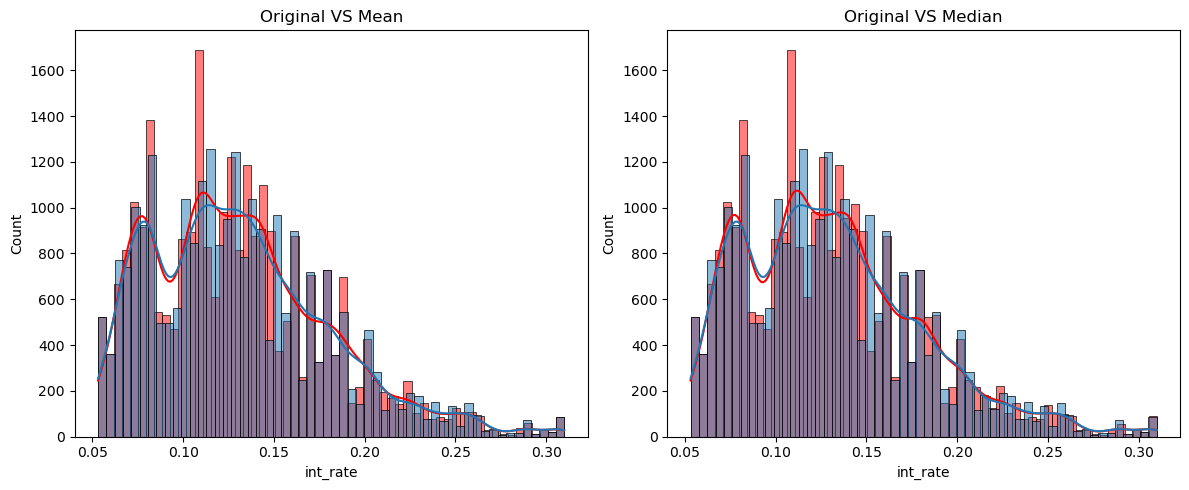

In [86]:
fintech_df_int_rate_mean = int_rate_fillna(fintech_df_cleaned, 'mean')
fintech_df_int_rate_median = int_rate_fillna(fintech_df_cleaned, 'median')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(fintech_df_int_rate_mean['int_rate'], ax=axes[0], kde=True, color='red')
sns.histplot(fintech_df_cleaned['int_rate'], ax=axes[0], kde=True)
axes[0].set_title('Original VS Mean')

sns.histplot(fintech_df_int_rate_median['int_rate'], ax=axes[1], kde=True, color='red')
sns.histplot(fintech_df_cleaned['int_rate'], ax=axes[1], kde=True)
axes[1].set_title('Original VS Median')

plt.tight_layout()
plt.show()


There may not be a noticiable difference between the two methods. So we can use the mean.

In [87]:
fintech_df_cleaned['int_rate'] = int_rate_fillna(fintech_df_cleaned)['int_rate']

#### 3. since the `annual_inc_joint` is the combined income of the borrower and the co-borrower, we can impute the missing values with the value of `annual_inc` as we can say that the co-borrower has no income.

In [88]:
def annual_inc_joint_fillna(df: pd.DataFrame) -> pd.DataFrame:
    fintech_df_annual_inc_joint = df.copy()

    fintech_df_annual_inc_joint['annual_inc_joint'] = fintech_df_annual_inc_joint['annual_inc_joint'].fillna(fintech_df_annual_inc_joint['annual_inc'])
    return fintech_df_annual_inc_joint

In [89]:
fintech_df_cleaned['annual_inc_joint'] = annual_inc_joint_fillna(fintech_df_cleaned)['annual_inc_joint']

#### 4. For `emp_length`: // TODO

## Findings and conclusions

# 4 - Data transformation and feature eng.

## 4.1 - Adding Columns

## 4.2 - Encoding

## 4.22 - Findings and conlcusions

## 4.3 - Normalization 

## 4.31 - Findings and conclusions

# 5 - Lookup Table(s)

# 6 - Bonus ( Data Integration )

## 5- Exporting the dataframe to a csv file or parquet